<a href="https://www.kaggle.com/code/basirajafarova/sales-analysis?scriptVersionId=142235805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salesdata/SalesDataAnalysis.ipynb
/kaggle/input/salesdata/sales_data.csv


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/kaggle/input/salesdata/sales_data.csv')

In [4]:
data.head(10)

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2.953869e+12,Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
6,2019-01-26 12:16:00,141240,27in 4K Gaming Monitor,5.173671e+12,Vêtements,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
7,2019-01-05 12:04:00,141241,USB-C Charging Cable,8.051737e+12,Vêtements,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
8,2019-01-01 10:30:00,141242,Bose SoundSport Headphones,1.508418e+12,Électronique,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950
9,2019-01-22 21:20:00,141243,Apple Airpods Headphones,1.386344e+12,Électronique,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000


In [5]:
data.shape

(185950, 11)

In [6]:
data.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,185950.000000,1.859500e+05,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,5.509211e+12,1.124383,184.399735,69.668583,185.490917,115.289422
std,51512.737110,2.598403e+12,0.442793,332.731330,109.424191,332.919771,225.227190
min,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185831.250000,3.254280e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230367.500000,5.511235e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275035.750000,7.765195e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319670.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000


In [7]:
data.isna().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [9]:
data

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


<Axes: xlabel='Product'>

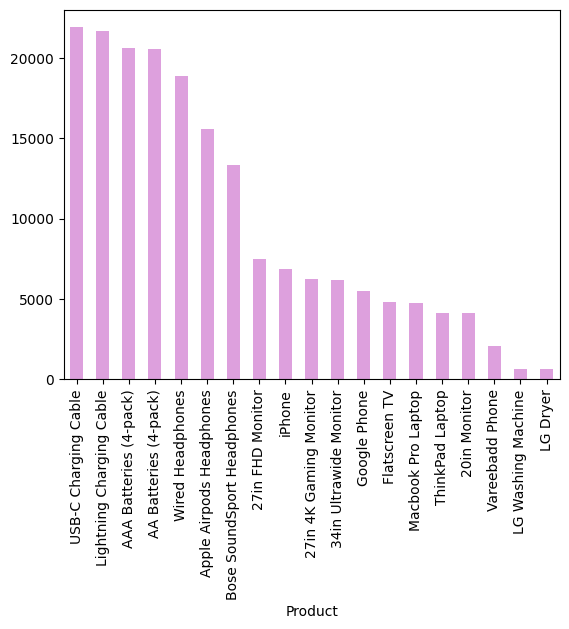

In [10]:
data.Product.value_counts().plot(kind='bar',color='plum')

<Axes: ylabel='count'>

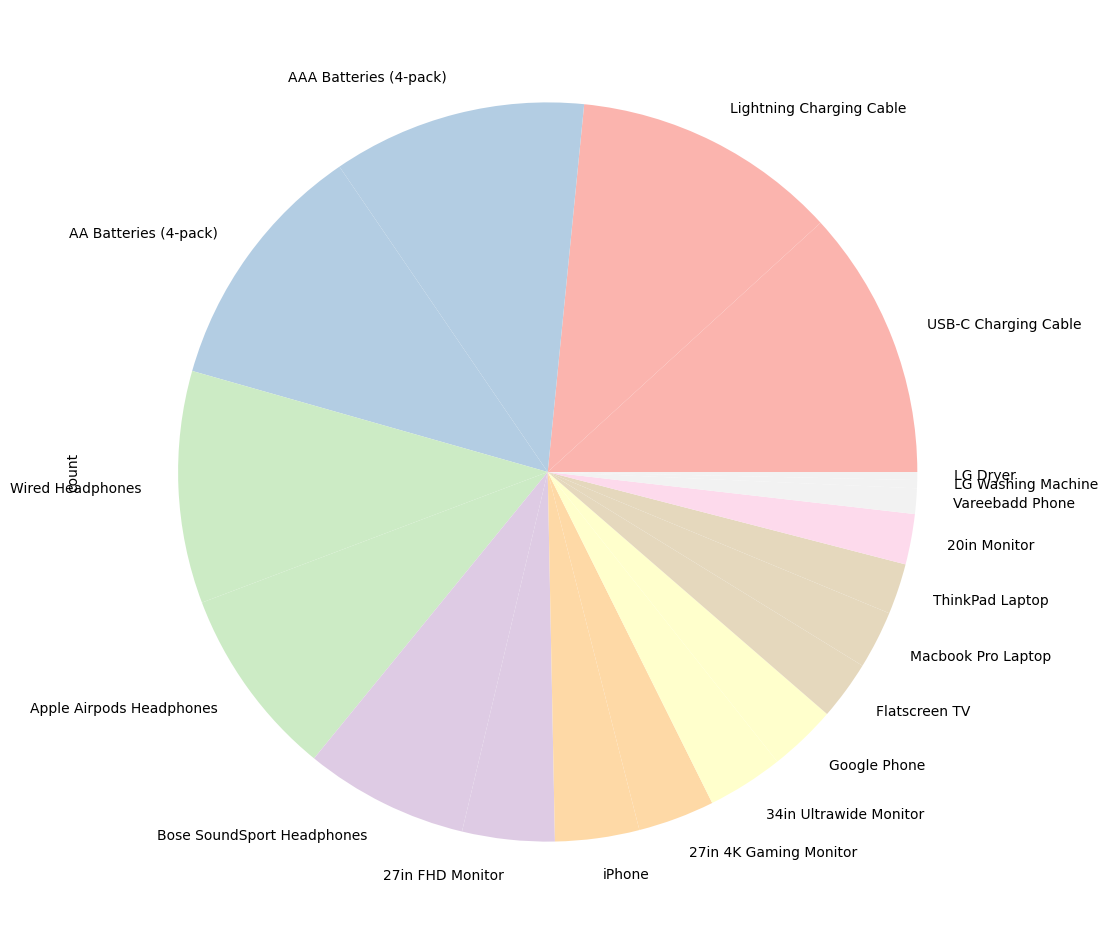

In [11]:
data.Product.value_counts().plot(kind='pie',figsize=(12,12),colormap="Pastel1")

In [12]:
import seaborn as sns

<Axes: xlabel='Product', ylabel='count'>

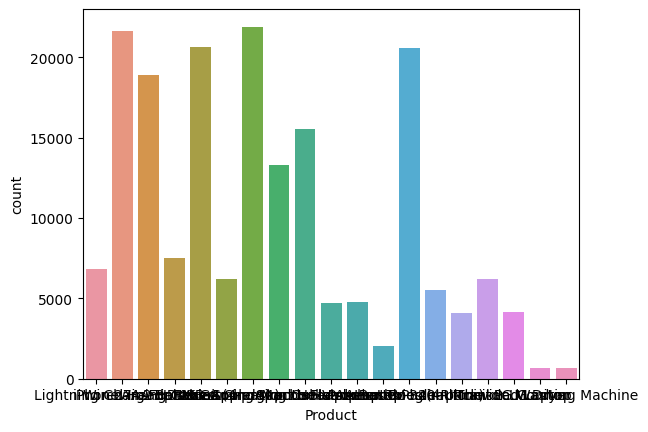

In [13]:
sns.countplot(x='Product', data=data)

In [14]:
apple=data[data.Product=='iPhone'] 
apple

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.0,231.0,700.0,469.0
104,2019-01-09 18:23:00,141336,iPhone,2.453024e+12,Vêtements,"811 Hickory St, Portland, OR 97035",1,700.0,231.0,700.0,469.0
164,2019-01-06 16:54:00,141394,iPhone,6.557914e+12,Électronique,"534 12th St, San Francisco, CA 94016",1,700.0,231.0,700.0,469.0
207,2019-01-10 15:40:00,141437,iPhone,1.282467e+12,Alimentation,"377 Meadow St, New York City, NY 10001",1,700.0,231.0,700.0,469.0
228,2019-01-09 22:11:00,141457,iPhone,4.613937e+12,Alimentation,"820 Jackson St, Seattle, WA 98101",1,700.0,231.0,700.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...
185873,2019-12-01 08:44:00,319596,iPhone,4.246598e+12,Vêtements,"436 14th St, New York City, NY 10001",1,700.0,231.0,700.0,469.0
185881,2019-12-26 19:06:00,319603,iPhone,1.429487e+12,Vêtements,"102 9th St, Boston, MA 02215",1,700.0,231.0,700.0,469.0
185907,2019-12-18 15:41:00,319629,iPhone,4.995307e+12,Alimentation,"941 Willow St, Dallas, TX 75001",1,700.0,231.0,700.0,469.0
185913,2019-12-11 16:29:00,319634,iPhone,1.172781e+12,Alimentation,"817 Center St, Boston, MA 02215",1,700.0,231.0,700.0,469.0


In [15]:
data

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


<Axes: xlabel='Product', ylabel='count'>

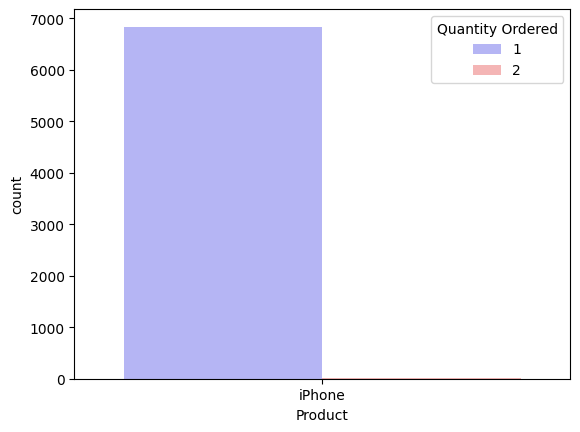

In [16]:
sns.countplot(x='Product', data=apple, hue='Quantity Ordered',palette='bwr')

In [17]:
data

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


<Axes: xlabel='margin'>

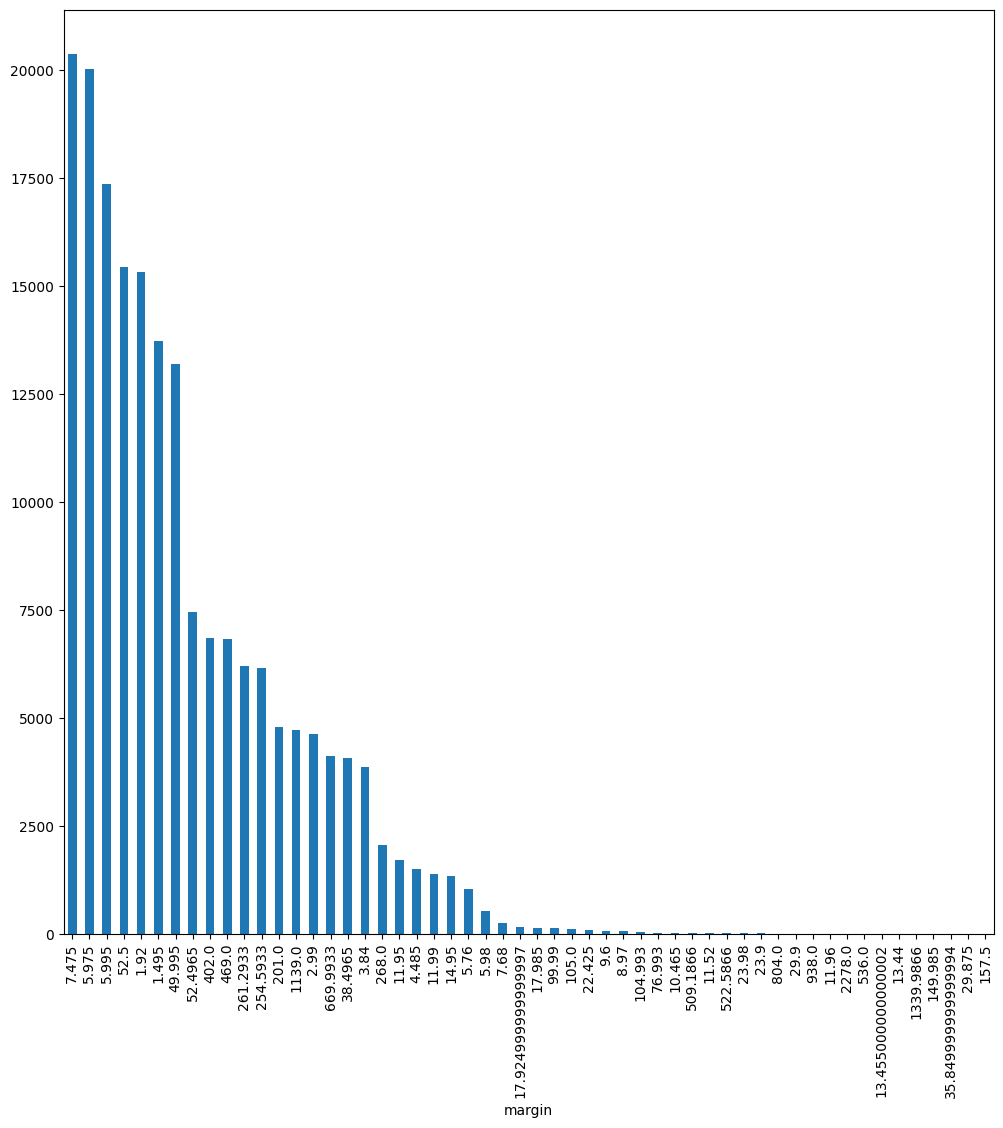

In [18]:
data.margin.value_counts().plot(kind='bar',figsize=(12,12))